<img src="https://www.sccpre.cat/mypng/full/403-4035365_tec-logo-png-logo-tec-de-monterrey.png"
        width="100"  style="float: left; margin-right: 10px;" /> 
       <div>
       <h1>Regresión Lineal Simple Caso Práctico</h1>
       <h4>Rezago Educativo y Pobreza<br>Armando Valdés López<br>Septiembre 2019</h4>
       </div>
     

In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

## 01.-Entendimiento del Negocio

## 02.- Entendimiento de los Datos

In [3]:
Base_de_Datos= pd.read_excel('analfabetismo.xlsx')
Datos=pd.DataFrame(Base_de_Datos)
Datos.head(7)

,Porcentaje_Analfabeta,Porcentaje_Pobreza
0,2.57861,30.531104
1,5.49744,67.111172
2,6.16559,61.360527
3,4.31758,52.800458
4,3.74449,45.338512
5,4.07382,46.958330
6,4.63764,56.136204


In [4]:
print("Descripción de los Datos")
print("Observaciones y Variables",Datos.shape)
summary = Datos.describe()
print(" ")
print("Resumen de Datos Cuantitativos")
print(summary)

Descripción de los Datos
Observaciones y Variables (2456, 2)
 
Resumen de Datos Cuantitativos
       Porcentaje_Analfabeta  Porcentaje_Pobreza
count            2456.000000         2456.000000
mean               13.984391           67.421505
std                 9.630251           18.516378
min                 0.557710            8.745311
25%                 6.480288           55.622230
50%                11.817330           69.862685
75%                18.994820           82.551284
max                66.547333           97.350405


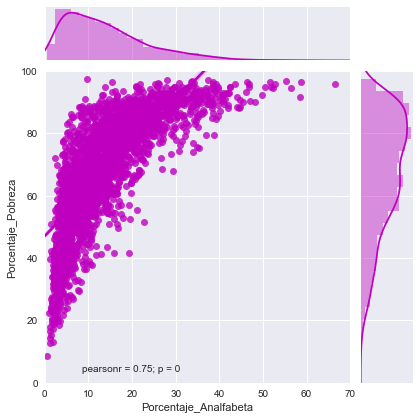

In [6]:
sns.set(style="darkgrid")
g = sns.jointplot("Porcentaje_Analfabeta", "Porcentaje_Pobreza", data=Datos,kind="reg",
                  xlim=(0,70) , ylim=(0, 100), color="m")

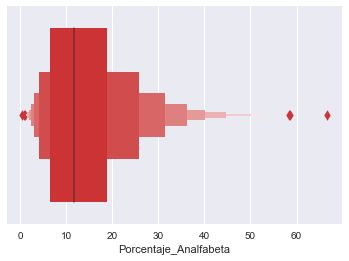

In [7]:
ax=sns.lvplot( x="Porcentaje_Analfabeta",data=Datos, palette="Set1")
#ax =sns.stripplot(x="por_per_re_ed", data=Datos, size=4, jitter=True, color="gray")


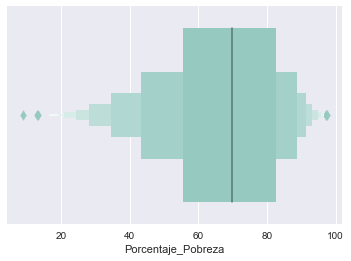

In [8]:
ax=sns.lvplot( x="Porcentaje_Pobreza",data=Datos, palette="Set3")
#ax =sns.stripplot(x="por_per_po", data=Datos, size=4, jitter=True, color="gray")

## 03.-Preparación de los Datos

## 04.-Modelado

In [9]:
x=np.array(Datos.Porcentaje_Analfabeta).reshape((-1,1))
y=np.array(Datos.Porcentaje_Pobreza)

### a.- Modelo de Regresión Lineal

In [10]:
model1=LinearRegression()
model1.fit(x,y)
R_sq1=model1.score(x,y)
y_pred1=model1.predict(x)
ecm1=mean_squared_error(y,y_pred1)
rms1 = sqrt(mean_squared_error(y,y_pred1))

### b.- Modelo de RandomForest

In [11]:
from sklearn.ensemble import RandomForestRegressor
model2= RandomForestRegressor()
model2.fit(x,y)
R_sq2=model2.score(x,y)
y_pred2=model2.predict(x)
ecm2=mean_squared_error(y,y_pred2)
rms2 = sqrt(mean_squared_error(y,y_pred2))

### c.- Modelo de Ridge Regression

In [18]:
from sklearn.linear_model import Ridge
model3= Ridge()
model3.fit(x,y)
R_sq3=model3.score(x,y)
y_pred3=model3.predict(x)
ecm3=mean_squared_error(y,y_pred3)
rms3 = sqrt(mean_squared_error(y,y_pred3))

ValueError: x must be a one-dimensional array or sequence.

## 05.-Evaluación

### a'.- Evaluación Regresión Lineal

In [13]:
print("Intercepto a",model1.intercept_)
print("Pendiente b",model1.coef_)
print("Coeficiente de determinación",R_sq1)
print("Error cuadrático medio",ecm1)
print("Raiz del error cuadrático medio", rms1)
print("y = "+ str(model1.intercept_) + " + "+ str(model1.coef_) +"*"+"x" )

Intercepto a 47.1392823936
Pendiente b [ 1.45034726]
Coeficiente de determinación 0.56899334123
Error cuadrático medio 147.713156407
Raiz del error cuadrático medio 12.15373014376103
y = 47.1392823936 + [ 1.45034726]*x


### b'.- Evaluación RandomForest

In [14]:
#print("Intercepto a",model2.intercept_)
#print("Pendiente b",model2.coef_)
print("Coeficiente de determinación",R_sq2)
print("Error cuadrático medio",ecm2)
print("Raiz del error cuadrático medio", rms2)
#print("y = "+ str(model2.intercept_) + " + "+ str(model2.coef_) +"*"+"x" )

Coeficiente de determinación 0.923714630801
Error cuadrático medio 26.1442658547
Raiz del error cuadrático medio 5.113146375243458


### c'.- Evaluación Ridge Regression

In [15]:
print("Intercepto a",model3.intercept_)
print("Pendiente b",model3.coef_)
print("Coeficiente de determinación",R_sq3)
print("Error cuadrático medio",ecm3)
print("Raiz del error cuadrático medio", rms3)
print("y = "+ str(model3.intercept_) + " + "+ str(model3.coef_) +"*"+"x" )

Intercepto a 47.139371475
Pendiente b [ 1.45034089]
Coeficiente de determinación 0.568993341219
Error cuadrático medio 147.713156411
Raiz del error cuadrático medio 12.153730143915784
y = 47.139371475 + [ 1.45034089]*x


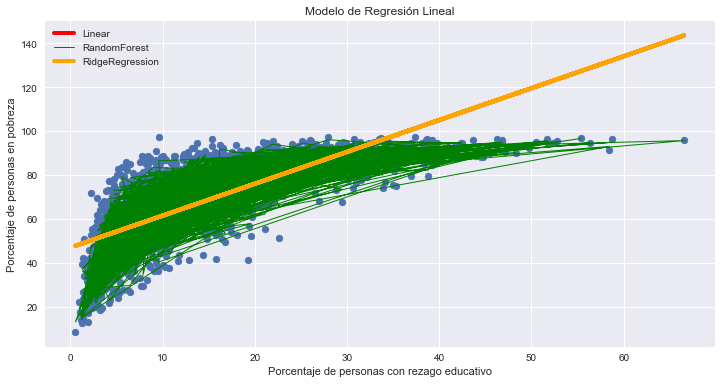

In [16]:
plt.figure(figsize=(12,6))
plt.scatter(x, y)
plt.title("Modelo de Regresión Lineal")
plt.xlabel("Porcentaje de personas con rezago educativo")
plt.ylabel("Porcentaje de personas en pobreza")
plt.plot(x,y_pred1,color="red",linewidth=4)
plt.plot(x,y_pred2,color="green", linewidth=1)
plt.plot(x,y_pred3,color="orange",linewidth=4)
plt.legend(["Linear", "RandomForest", "RidgeRegression"], loc="upper left")

plt.show()

## 06.-Implementación